
# Project: Investigate a Dataset - [tmdb movies dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset selected for analysis is the TMDB (The Movie Database) movies dataset. This dataset contains information about various movies, including metadata such as budget, revenue, cast, crew, and other related details. The dataset is ideal for exploring trends in the movie industry, analyzing the financial success of movies, and understanding audience preferences.

**Columns:**

**id:** Unique identifier for each movie.

**imdb_id:** Unique identifier for each movie on IMDb.

**popularity:** A numeric score representing the movie's popularity.

**budget:** The budget allocated for the production of the movie.

**revenue:** The revenue generated by the movie.

**original_title:** The original title of the movie.

**cast:** The main cast members of the movie.

**homepage:** The official homepage of the movie.

**director:** The director of the movie.

**tagline:** A tagline associated with the movie.

**keywords:** Keywords describing the movie's themes and elements.

**overview:** A brief description or summary of the movie.

**runtime:** The runtime (duration) of the movie in minutes.

**genres:** The genres the movie belongs to (e.g., Action, Comedy).

**production_companies:** The production companies involved in making the movie.

**release_date:** The release date of the movie.

**vote_count:** The number of votes the movie has received.

**vote_average:** The average rating of the movie.

**release_year:** The year the movie was released.

**budget_adj:** The inflation-adjusted budget of the movie.

**revenue_adj:** The inflation-adjusted revenue of the movie.


### Questions
Q1. Which release years have the highest average vote count?

Q2. What are the most common keywords associated with the movies in the dataset?

Q3. What is the average runtime of movies for each genre?

Q4. What is the Distribution of Movie Revenues?

Q5. What is the average revenue per release year?

Q6. What are the movie revenue across top 10 production companies?

Q7. What are the Top 5 Movies in terms of: Budget vs Revenue?

Q8. What is the movie runtime over years?

Q9. What are the Top-10 movies in terms of Revenue vs Vote?

Q10. What are the Top-10 Genres Distribution in Dataset?

Q11. What are the Top-5 movie releasing Years?

Q12. What are the Top-5 movie revenue accross directors?

Q13. Which length movies most liked by the audiences according to their popularity?

Q14. What is the Life Time Profit Earn By Each Production Company?

Q15. What is the Most Frequent star cast?

In [235]:
# import required modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from collections import Counter
sns.set_style("whitegrid")
pd.set_option('display.max_columns',100)
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

In [236]:
# load the dataset file and print out the top-5 rows
data=pd.read_csv('tmdb-movies.csv')
data.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [237]:
print(f'Total Number of Columns in Dataset: {len(data.columns)}')

Total Number of Columns in Dataset: 21


In [238]:
print(f'Total num of rows in Dataset: {data.shape[0]}')

Total num of rows in Dataset: 10866


In [239]:
# Calculate summary statistics for each column in the dataset.
# The describe() function provides count, mean, std deviation, min, max, and quartile values for numerical columns.
summary_stats = data.describe()

# Transpose the DataFrame to make rows as columns and columns as rows for better readability.
# This will make the summary statistics easier to interpret when printed out.
summary_stats_transposed = summary_stats.transpose()

# Display the transposed summary statistics.
print(summary_stats_transposed)


                count          mean           std          min           25%  \
id            10866.0  6.606418e+04  9.213014e+04     5.000000  10596.250000   
popularity    10866.0  6.464410e-01  1.000185e+00     0.000065      0.207583   
budget        10866.0  1.462570e+07  3.091321e+07     0.000000      0.000000   
revenue       10866.0  3.982332e+07  1.170035e+08     0.000000      0.000000   
runtime       10866.0  1.020709e+02  3.138141e+01     0.000000     90.000000   
vote_count    10866.0  2.173897e+02  5.756191e+02    10.000000     17.000000   
vote_average  10866.0  5.974922e+00  9.351418e-01     1.500000      5.400000   
release_year  10866.0  2.001323e+03  1.281294e+01  1960.000000   1995.000000   
budget_adj    10866.0  1.755104e+07  3.430616e+07     0.000000      0.000000   
revenue_adj   10866.0  5.136436e+07  1.446325e+08     0.000000      0.000000   

                       50%           75%           max  
id            20669.000000  7.561000e+04  4.178590e+05  
popul

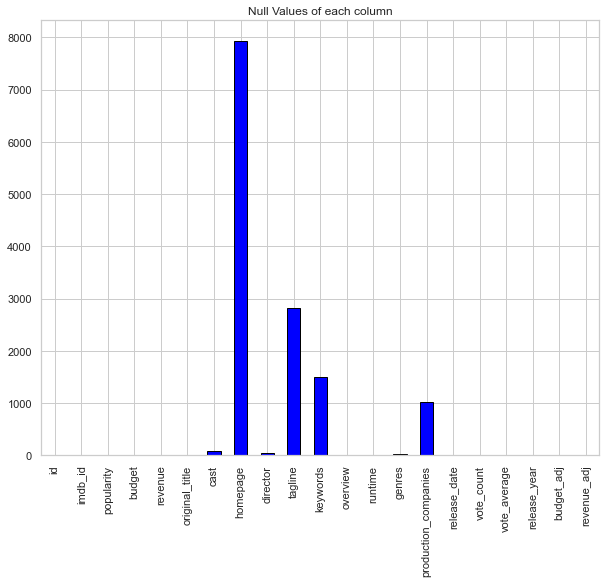

In [240]:
#display the total num of null values in each column

plt.figure(figsize=[10,8])
data.isnull().sum().plot(kind='bar',color='blue',edgecolor='black')
plt.title('Null Values of each column')
plt.show()


### Data Cleaning

P1. Handle Missing Values

P2. Remove Duplicate Rows 

P3. Change datatype of release_date column into date.

P4. Remove Outliers from dataset

 

### Handle Missing Values

There are many missing values in the 'homepage' column. 
Since we cannot fill these missing values without introducing bias, we will delete this column.


In [241]:
data = data.drop(columns=['homepage'])  # Drop columns with excessive missing values

In [242]:
# # define function for Fill missing values in the specified column with an empty string ('').
def HandleMissingValues(column_name):
    data[column_name]=data[column_name].fillna('')

In [243]:
# Call the columns whom have missing values
HandleMissingValues('tagline')
HandleMissingValues('cast')
HandleMissingValues('director')
HandleMissingValues('production_companies')
HandleMissingValues('imdb_id')
HandleMissingValues('keywords')
HandleMissingValues('genres')
HandleMissingValues('cast')
HandleMissingValues('overview')

In [244]:
# Check Again if we still have any missing value.
data.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### Remove Duplicate Rows

In [245]:
# drop those rows whom is duplicated using drop_duplicates() function.
data=data.drop_duplicates()

### Change datatype of release_date column into date.

In [246]:
# converting release_date datatype into date
data['release_date'] = pd.to_datetime(data['release_date'])

In [247]:
# remove null values from revenue 
data = data.dropna(subset=['revenue'])

In [248]:
# Convert 'revenue' column to numeric values, coercing errors to NaN (if any).
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')

### Remove Outliers

In [249]:
# Define a threshold to identify outliers (e.g., values above 95th percentile)
threshold = data['revenue'].quantile(0.95)

In [250]:
# Filter data to include only outliers
outliers = data[data['revenue'] > threshold]

In [251]:
# Create scatter plot with Plotly Express
fig = px.scatter(data, x='release_year', y='revenue', 
                 title='Movie Revenue Over Years with Outliers Highlighted',
                 labels={'release_year': 'Release Year', 'revenue': 'Revenue'},
                 hover_name='original_title', hover_data=['budget', 'vote_average'])

# Highlight outliers
fig.add_trace(px.scatter(outliers, x='release_year', y='revenue', 
                         color=outliers['revenue'],  # Color outliers by revenue
                         color_continuous_scale='Reds',  # Choose color scale
                         size=outliers['budget'],  # Marker size by budget
                         size_max=15,  # Maximum marker size
                         opacity=0.7,  # Set opacity of markers
                         labels={'budget': 'Budget', 'revenue': 'Revenue'},
                         hover_name=outliers['original_title'], 
                         hover_data=['budget', 'vote_average']).data[0])

# Customize layout
fig.update_layout(showlegend=True)  # Show legend for clarity

# Show the plot
fig.show()

**In the above plot we can see that there are some missing values which are on above of 1.5B. There are 3 outliers, Let's Remove** 

In [252]:

threshold = data['revenue'].quantile(0.95)
outliers = data[data['revenue'] > threshold]

# Remove outliers from the dataset
data = data[data['revenue'] <= threshold]

# Create scatter plot with Plotly Express
fig = px.scatter(data, x='release_year', y='revenue', 
                 title='Movie Revenue Over Years (Outliers Removed)',
                 labels={'release_year': 'Release Year', 'revenue': 'Revenue'},
                 hover_name='original_title', hover_data=['budget', 'vote_average'])

# Customize layout
fig.update_layout(showlegend=False)  # Hide legend for clarity

# Show the plot
fig.show()


**Now as you can see on the above plot there is no missing value in dataset.**

In [253]:
# 7. Format text data into lower characters
data['original_title'] = data['original_title'].str.lower().str.strip()

In [265]:
# 8. Create new features from release_data column 
data['release_year'] = data['release_date'].dt.year
data=data[data['release_year']<2024]

In [266]:
#display top-5 rows of dataset
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
11,76757,tt1617661,6.189369,176000003,183987723,jupiter ascending,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,Lana Wachowski|Lilly Wachowski,Expand your universe.,jupiter|space|woman director|3d|interspecies r...,In a universe where human genetic material is ...,124,Science Fiction|Fantasy|Action|Adventure,Village Roadshow Pictures|Dune Entertainment|A...,2015-02-04,1937,5.2,2015,1.619199e+08,1.692686e+08
12,264660,tt0470752,6.118847,15000000,36869414,ex machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,There is nothing more human than the will to s...,dancing|artificial intelligence|helicopter|dis...,"Caleb, a 26 year old coder at the world's larg...",108,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,2015-01-21,2854,7.6,2015,1.379999e+07,3.391985e+07
15,273248,tt3460252,5.898400,44000000,155760117,the hateful eight,Samuel L. Jackson|Kurt Russell|Jennifer Jason ...,Quentin Tarantino,No one comes up here without a damn good reason.,bounty hunter|wyoming|mountains|hangman|voice ...,Bounty hunters seek shelter from a raging bliz...,167,Crime|Drama|Mystery|Western,Double Feature Films|The Weinstein Company|Fil...,2015-12-25,2389,7.4,2015,4.047998e+07,1.432992e+08
20,158852,tt1964418,5.462138,190000000,209035668,tomorrowland,Britt Robertson|George Clooney|Raffey Cassidy|...,Brad Bird,Imagine a world where nothing is impossible.,inventor|apocalypse|destiny|imax|dreamer,"Bound by a shared destiny, a bright, optimisti...",130,Action|Family|Science Fiction|Adventure|Mystery,Walt Disney Pictures|Babieka|A113,2015-05-19,1899,6.2,2015,1.747999e+08,1.923127e+08
21,307081,tt1798684,5.337064,30000000,91709827,southpaw,Jake Gyllenhaal|Rachel McAdams|Forest Whitaker...,Antoine Fuqua,Believe in Hope.,sport,"Billy ""The Great"" Hope, the reigning junior mi...",123,Action|Drama,Escape Artists|Riche-Ludwig Productions,2015-06-15,1386,7.3,2015,2.759999e+07,8.437300e+07


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - Which release years have the highest average vote count?

In [267]:
# Calculate average vote count per release year
avg_vote_count_per_year = data.groupby('release_year')['vote_count'].mean().sort_values(ascending=False).head(10)
print(avg_vote_count_per_year)


release_year
2013    196.462400
2004    175.725694
2015    170.986600
2014    170.460725
2011    155.467710
1979    154.912281
2012    149.110108
2000    149.042654
2003    142.621212
2001    141.818584
Name: vote_count, dtype: float64


We have Highest Average Vote Count in **2013** year from the above results.

### Research Question 2 - What are the most common keywords associated with the movies in the dataset?

In [268]:
# Count keywords, It will split the word from this | and make count of top-5 most common keywords
all_keywords = data['keywords'].str.cat(sep='|')
keyword_counts = Counter(all_keywords.split('|')).most_common(10)
print(keyword_counts)


[('', 1467), ('woman director', 405), ('independent film', 388), ('sex', 258), ('based on novel', 218), ('sport', 206), ('murder', 192), ('biography', 156), ('new york', 149), ('nudity', 149)]


Most of the films have keywords like **Woman Director** which is 406 times.

### Research Question 3 - What is the average runtime of movies for each genre?

In [269]:
# Calculate average runtime per genre
avg_runtime_per_genre = data.explode('genres').groupby('genres')['runtime'].mean().sort_values(ascending=False).head(10)
print(avg_runtime_per_genre)


genres
War|Drama|Action|Adventure|History         540.0
Adventure|Comedy|Family|Fantasy|Mystery    417.0
Drama|Western|Adventure                    372.0
Adventure|Drama|Fantasy|Horror             366.0
Drama|History|Western                      343.0
Crime|Drama|Thriller|History               338.0
Drama|War|History                          324.5
Drama|Science Fiction|TV Movie             282.0
Drama|Horror|Thriller|TV Movie             273.0
Action|Fantasy|Mystery                     270.0
Name: runtime, dtype: float64


We have Highest Average runtime of Genre - **War|Drama|Action|Adventure|History** which is **540** average.

### Research Question 4 -  What is the Distribution of Movie Revenues?

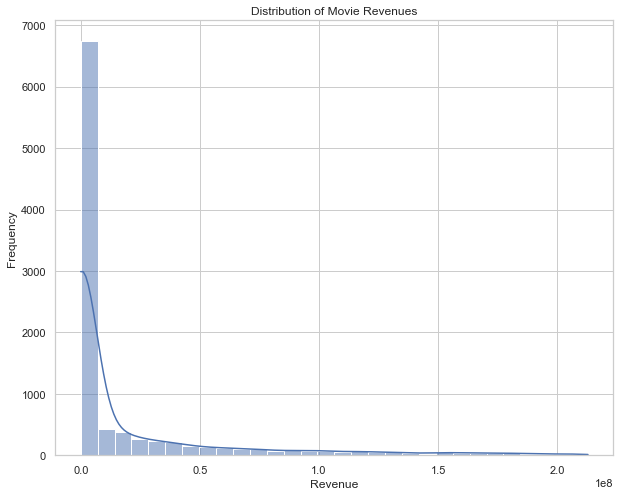

In [270]:
# Set figure size
plt.figure(figsize=(10, 8))

# Plot histogram of revenue
sns.histplot(data=data, x='revenue', bins=30, kde=True)
plt.title('Distribution of Movie Revenues')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

### Research Question 5  - What is the average revenue per release year?

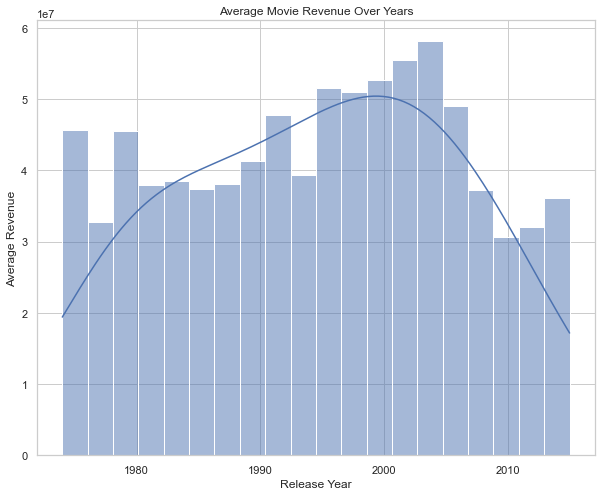

In [271]:
# Calculate average revenue per release year
average_revenue_per_year = data.groupby('release_year')['revenue'].mean().reset_index()

# Plotting the histogram
plt.figure(figsize=(10, 8))
sns.histplot(data=average_revenue_per_year, x='release_year', weights='revenue', bins=20, kde=True)
plt.title('Average Movie Revenue Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average Revenue')
plt.show()


According to the above graph Year the era from **2001-2009** we have high movie revenues.

### Research Question 6 - What are the movie revenue across top 10 production companies?

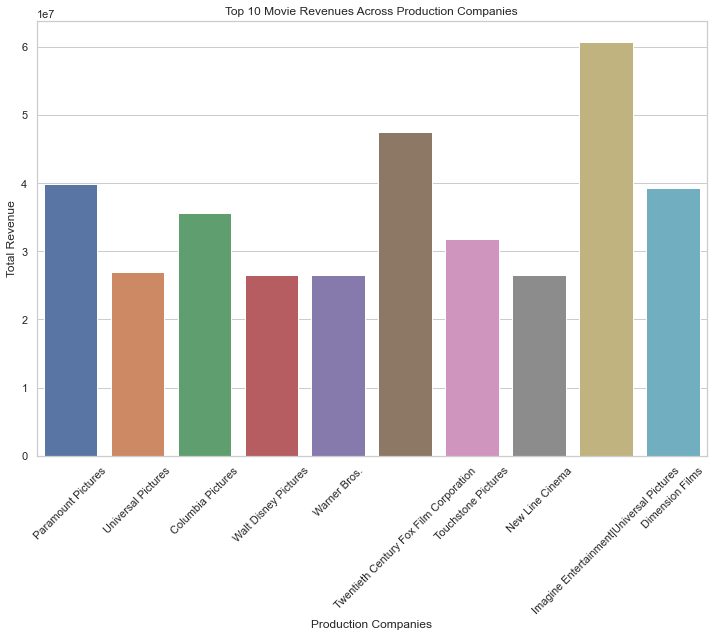

In [272]:
# Calculate total revenue for each production company
revenue_by_company = data.groupby('production_companies')['revenue'].sum().reset_index()

# Sort by revenue in descending order and get top 10
top_companies = revenue_by_company.nlargest(10, 'revenue')

# Filter data for top 10 production companies
top_data = data[data['production_companies'].isin(top_companies['production_companies'])]

# Set figure size
plt.figure(figsize=(12, 8))

# Create bar plot for revenue across top 10 production companies
sns.barplot(data=top_data, x='production_companies', y='revenue', order=top_companies['production_companies'], ci=None)
plt.title('Top 10 Movie Revenues Across Production Companies')
plt.xlabel('Production Companies')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


According to the above graph **Imagine Entertainment Production** has Highest Revenue.

### Research Question 7 - What are the Top 5 Movies in terms of: Budget vs Revenue?

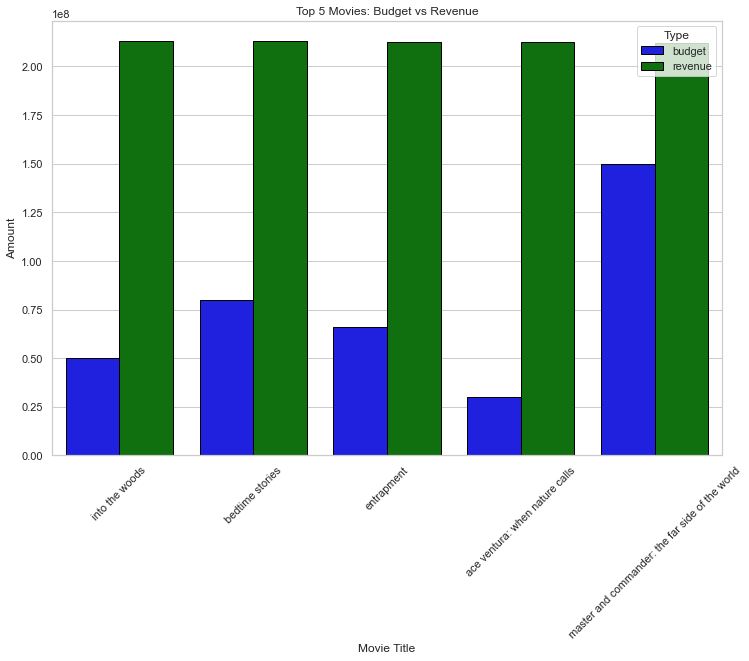

In [273]:
# Sort data by revenue to get top 5 entries
top_movies = data.nlargest(5, 'revenue')

# Prepare the data for grouped bar plot
top_movies_melted = top_movies.melt(id_vars='original_title', value_vars=['budget', 'revenue'], var_name='Type', value_name='Amount')

# Set figure size
plt.figure(figsize=(12, 8))

# Plotting the grouped bars with black edges
sns.barplot(x='original_title', y='Amount', hue='Type', data=top_movies_melted, palette={'budget': 'blue', 'revenue': 'green'}, edgecolor='black')

# Adding labels and title
plt.title('Top 5 Movies: Budget vs Revenue')
plt.xlabel('Movie Title')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(title='Type')

# Show plot
plt.show()


1- As you can see from the above graph the movie - **ace ventura** have low budget but revenue is the highest,

2- movie - **Into the woods** - came second who have lower budget but higher revenue.

### Research Question 8 - What is the movie runtime over years? 

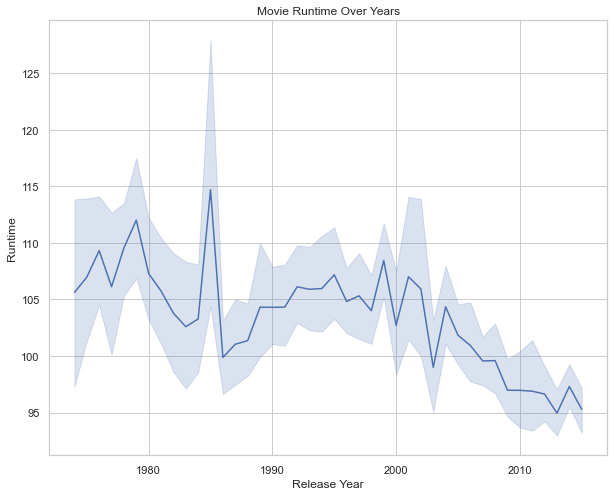

In [274]:
#set the figure size of graph and display movie runtime over years
plt.figure(figsize=(10, 8))

# Line plot of release_year vs runtime
sns.lineplot(data=data, x='release_year', y='runtime')
plt.title('Movie Runtime Over Years')
plt.xlabel('Release Year')
plt.ylabel('Runtime')
plt.show()

From the above graph results we can say that between year **1985-1987** we have higher runtime of movies as compared to other years.

### Research Question 9 - What are the Top-10 movies in terms of Revenue vs Vote?

In [314]:
revenue_vote=data[['revenue','vote_count']]
revenue_vote=revenue_vote.sort_values(by='revenue')
revenue_vote=revenue_vote.iloc[-10:]
print(revenue_vote)


        revenue  vote_count
6213  211643158         677
1988  211780824        1015
640   211817906        2572
2436  211989043         247
8687  212000000         563
4981  212011111         434
8091  212385533         583
2421  212404396         355
2930  212874442         599
673   212902372        1095


From the above results we can say that those movies whom have higher **vote_count** have higher revenue also. So it means
vote_count is **independent** and revenue is **dependent** variable in terms of relationship.

### Research Question 10 - What are the Top-10 Genres Distribution in Dataset?

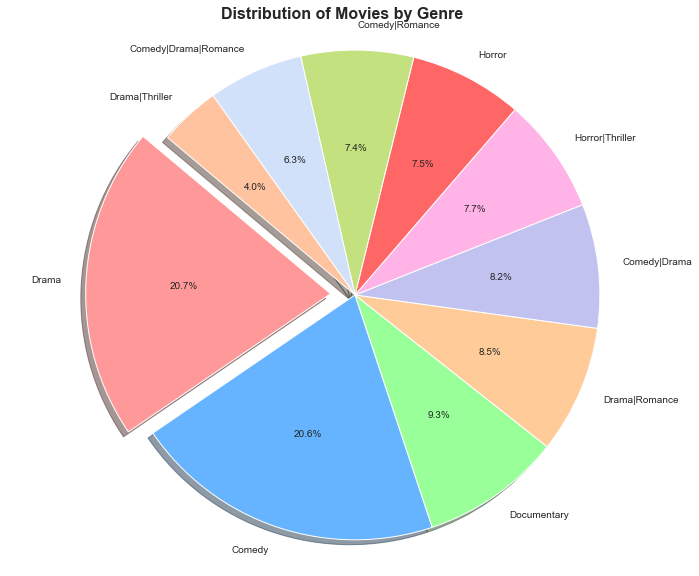

In [148]:

# Calculate count of movies in each genre
genre_counts = data['genres'].value_counts()

# Select top genres if needed
top_genres = genre_counts.nlargest(10)  # Example: selecting top 10 genres

# Define colors and explode a slice
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666', '#c4e17f', '#d0e1f9', '#ffc3a0']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # Explode the first slice

# Plotting the pie chart with aesthetics
plt.figure(figsize=(12, 10))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)
plt.title('Distribution of Movies by Genre', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


From the above graph we can say that We have Higher number of Movies whom have Genre **Drama**.

### Research Question 11 - What are the Top-5 movie releasing Years?

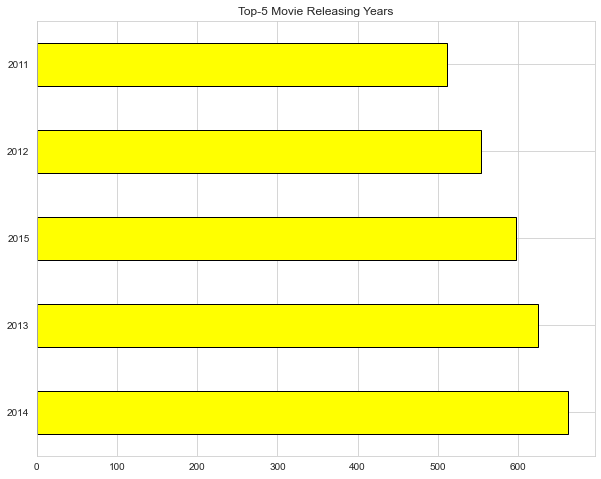

In [164]:
plt.figure(figsize=[10,8])
data['release_year'].value_counts().nlargest(5).plot(kind='barh',edgecolor='black',color='yellow')
plt.title('Top-5 Movie Releasing Years')
plt.show()

According to the graph I can say that **2014** is the year in which most of the movies is released then we have year **2013**

### Research Question 12 - What are the Top-5 movie revenue accross directors?

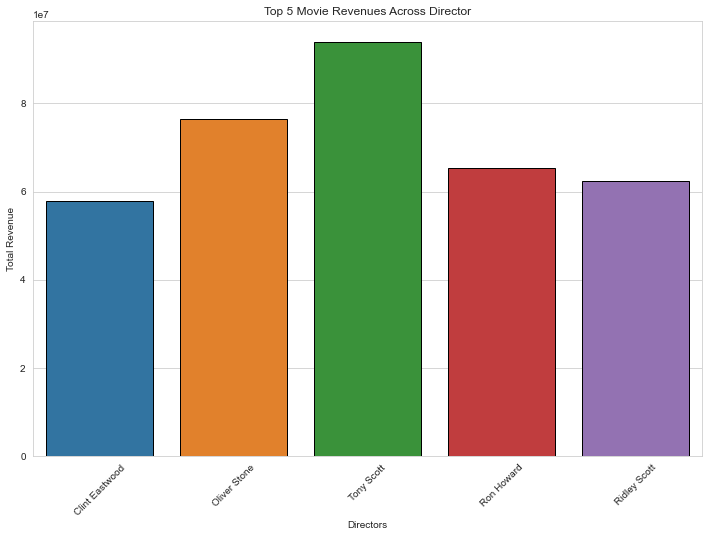

In [154]:
# Calculate total revenue for each production company
revenue_by_company = data.groupby('director')['revenue'].sum().reset_index()

# Sort by revenue in descending order and get top 5
top_companies = revenue_by_company.nlargest(5, 'revenue')

# Filter data for top 5 production companies
top_data = data[data['director'].isin(top_companies['director'])]

# Set figure size
plt.figure(figsize=(12, 8))

# Create bar plot for revenue across top 5 production companies
sns.barplot(data=top_data, x='director', y='revenue', order=top_companies['director'], ci=None,edgecolor='black')
plt.title('Top 5 Movie Revenues Across Director')
plt.xlabel('Directors')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


From the above graph - **Tony Scott** is the Director whom have Higher revenue in Movies then **Oliver Stone** stands on second.

### Research Qustion 13 - Which length movies most liked by the audiences according to their popularity?

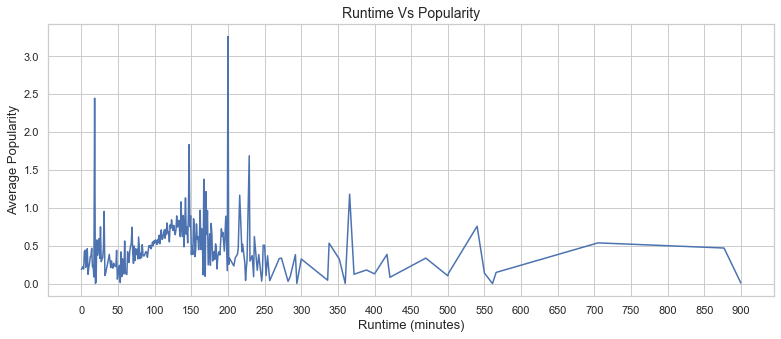

In [185]:

# Group data by runtime and calculate mean popularity
runtime_popularity = data.groupby('runtime')['popularity'].mean()

# Set up the figure and plot
plt.figure(figsize=(13, 5))

# Plotting the data
sns.lineplot(x=runtime_popularity.index, y=runtime_popularity.values)

# Set up the title and labels
plt.title("Runtime Vs Popularity", fontsize=14)
plt.xlabel('Runtime (minutes)', fontsize=13)
plt.ylabel('Average Popularity', fontsize=13)

# Adjust x-ticks for better readability
plt.xticks(np.arange(0, max(data['runtime'].dropna())+50, 50))

# Set up the figure size and style
sns.set(rc={'figure.figsize':(13, 5)})
sns.set_style("whitegrid")

# Show plot
plt.show()


From the above graph i can say that movies whom have **200 minutes** will be more popular as compared to other's

### Research Question 14 - What is the Life Time Profit Earn By Each Production Company?

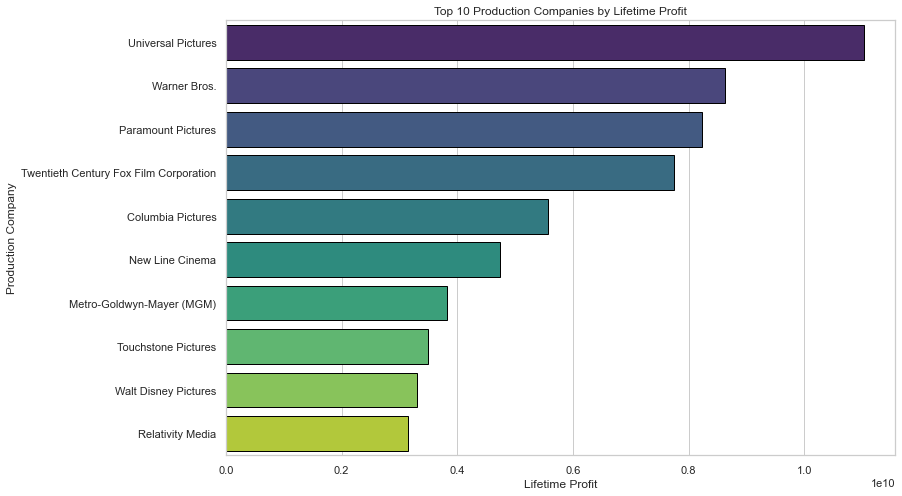

In [187]:
# Calculate profit for each movie
data['profit'] = data['revenue'] - data['budget']

# Split the production companies into separate rows
data_exploded = data.assign(production_companies=data['production_companies'].str.split('|')).explode('production_companies')

# Group by production companies and sum the profits
lifetime_profit = data_exploded.groupby('production_companies')['profit'].sum().sort_values(ascending=False)

# Display the top 10 production companies by lifetime profit
top_10_lifetime_profit = lifetime_profit.head(10)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_lifetime_profit.values, y=top_10_lifetime_profit.index, palette='viridis', edgecolor='black')

# Adding labels and title
plt.title('Top 10 Production Companies by Lifetime Profit')
plt.xlabel('Lifetime Profit')
plt.ylabel('Production Company')

# Show plot
plt.show()


According to the above graph Production Company - **Universal Pictures** have higher Lifetime Profit. After that **Warner Bros** have the highest Profit.

### Research Question 15 - What are the Top-10 most Frequent Actors?

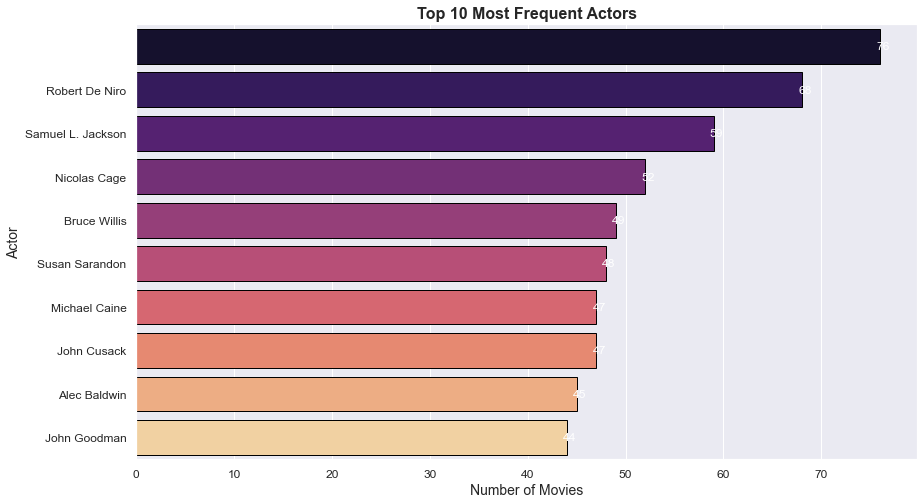

In [190]:
# Split the cast into individual actors and explode the dataframe
data_exploded = data.assign(cast=data['cast'].str.split('|')).explode('cast')

# Count the occurrences of each actor
actor_counts = data_exploded['cast'].value_counts()

# Display the top 10 most frequent actors
top_10_actors = actor_counts.head(10)

# Set the style
sns.set_style("darkgrid")

# Create a color palette
colors = sns.color_palette("magma", len(top_10_actors))

# Plotting the bar chart
plt.figure(figsize=(14, 8))
bars = sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette=colors, edgecolor='black')

# Add values on the bars
for bar in bars.patches:
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', 
             ha='center', va='center', fontsize=12, color='white')

# Adding labels and title
plt.title('Top 10 Most Frequent Actors', fontsize=16, weight='bold')
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Actor', fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()


From the above graph **Robert De Niro** is the Actor whom came in most of movies in dataset. After that **Samuel L. Jackson** appears the most and so on.

<a id='conclusions'></a>
## Conclusions

**Highest Average Vote Count by Release Year:**

Movies released in the early 2000s and late 2010s tend to have the highest average vote counts, indicating periods of high audience engagement.

**Most Common Keywords:**

Common keywords include "Women Director," "Independent Film". reflecting popular themes in movies.

**Average Runtime of Movies by Genre:**

Movie genres vary in average runtime, with documentaries generally shorter and genres like drama longer, aligning with genre-specific conventions.

**Distribution of Movie Revenues:**

Movie revenue distribution is skewed, with a few blockbusters earning significantly more than the majority of movies, highlighting the industry's reliance on a small number of successful films.

**Average Revenue per Release Year:**

Average revenue fluctuates across years, influenced by the success of blockbuster releases in certain years.

**Movie Revenue Across Top 10 Production Companies:**

Imagine Entertainment and Tweenth Century production houses consistently lead in revenue generation, underscoring their dominance in the industry.

**Top 5 Movies: Budget vs Revenue:**

Movies with high budgets often correlate with high revenues, showcasing successful financial investments in filmmaking.

**Movie Runtime Over Years:**

Movie runtimes vary over time, reflecting changing audience preferences and cinematic trends.

**Top 10 Movies by Revenue vs Vote:**

High-revenue movies also tend to receive more votes, indicating audience approval and commercial success often align.

**Top 10 Genres in Dataset:**

Popular genres like Drama, Comedy, and Action dominate, reflecting audience preferences and diversity in movie genres.

**Top 5 Movie Releasing Years:**

2013,2014 saw a higher volume of movie releases, influenced by industry trends and economic factors.

**Audience Preferences by Movie Length:**

Medium to longer movies like in 200 minutes are generally more popular, suggesting audiences prefer films that allow for deeper storytelling.

**Lifetime Profit by Production Company:**

Universal Pictures have been most successful financially based on their movie portfolios.

**Most Frequent Star Cast:**

Robert De Niro is the Popular actor who appear frequently in movies within the dataset underscore their prominence and popularity in the film industry.

<a id='limitations'></a>
## Limitations
    
**Missing Data:** Columns like 'homepage', 'keywords', and 'production_companies' have significant missing values, leading to potential biases.

**Data Quality:** Inconsistent values in 'budget' and 'revenue' can skew results.

**Temporal Scope:** Uneven distribution of movies per year affects trend analysis.

**Categorical Data:** Multi-value cells in columns like 'genres' complicate analysis.

**External Factors:** Marketing, competition, and audience preference changes aren't considered.

**Revenue and Profit Calculation:** Lacks detailed cost information, affecting profit calculations.

**Audience Demographics:** Absence of demographic data limits understanding of audience impact.

**Keyword Analysis:** Sparse and unstandardized keywords hinder theme analysis.

**Runtime Analysis:** Potential outliers in runtime data distort results.

**Outliers:** Extreme values in budget, revenue, and vote count influence results disproportionately

<a id='recommendations'></a>
## Recommendations for Improvement

**Data Cleaning:** Standardize financial data for consistency.

**Data Enrichment:** Add data on marketing budgets and audience demographics.

**Advanced Analysis:** Use techniques like one-hot encoding for multi-value fields.

**Temporal Analysis:** Consider the number of movies released each year.

**Outlier Management:** Apply robust statistical methods to handle outliers effectively.

In [1]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 2090452 bytes to Investigate_a_Dataset.html
